In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
from langchain.chat_models import init_chat_model
from typing_extensions import TypedDict , Annotated
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition

In [17]:
class State(TypedDict):
    messages : Annotated[list,add_messages]

In [18]:
import os
apikey=os.getenv("GROQ_API_KEY")

In [24]:
@tool
def get_stock_price(symbol: str)-> float:
    '''When stock prize realted comes use this method to return the value with respect to the symbol. Return the current price of a stock market for the  given stock symbol 
    :param symbol: stock symbol
    :return: current price of the stock
    '''
    return {
        "MSFT" : 200.3,
        "AAPL" : 100.4,
        "AMZN" : 150.0,
        "RIL" :87.6
    }.get(symbol,0.0)

### list of tools

tools = [get_stock_price]

llm = init_chat_model("llama-3.3-70b-versatile",model_provider="groq")
llm_with_tools = llm.bind_tools(tools)

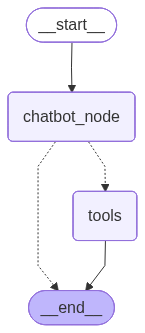

In [25]:
class State(TypedDict):
    messages : Annotated[list,add_messages] 


def chatbot(state: State) -> State:
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


builder = StateGraph(State)

builder.add_node("chatbot_node",chatbot)
builder.add_node("tools",ToolNode(tools))


builder.add_edge(START,"chatbot_node")
builder.add_conditional_edges("chatbot_node",tools_condition )
builder.add_edge("chatbot_node",END)

graph = builder.compile()

from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
message= {"role": "user","content":"What is the price of MSFT stock right now?"}
response = graph.invoke({"messages":[message]},verbose = True)

In [27]:
response["messages"][-1].content

'200.3'

In [28]:
response

{'messages': [HumanMessage(content='What is the price of MSFT stock right now?', additional_kwargs={}, response_metadata={}, id='bedd8662-0caa-459b-9bbb-4b1e90fcf8c8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rs9vy7bkq', 'function': {'arguments': '{"symbol":"MSFT"}', 'name': 'get_stock_price'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 308, 'total_tokens': 324, 'completion_time': 0.039720862, 'prompt_time': 0.029792776, 'queue_time': 0.057440974, 'total_time': 0.069513638}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_0ca3f8c386', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--8d19448d-10b6-4c96-8051-e031d6e39182-0', tool_calls=[{'name': 'get_stock_price', 'args': {'symbol': 'MSFT'}, 'id': 'rs9vy7bkq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 308, 'output_tokens': 16, 'total_tokens': 324}),
  ToolMe

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_b1442291a8', 'id': 'chatcmpl-Cbh0keSUzlyhzVVkPeoDZd1xvgHH4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--b957a394-8e2d-481d-ab6d-225b324dd813-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})